<a href="https://colab.research.google.com/github/Rochakr4/Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

# **Objectives**

The objective of the project would be to derive meanignful insights from the given data set. Following are the pointers we would be focusing on:

1. Data cleaning and finalising features 
2. Analysing global terror events
3. Analysing most affected regions
4. Analysing most affected countries 

THE INFORMATION REGARDING COLOUMN SUCH AS COLOUMN DEFINITION AND EXPLANATION HAS BEEN TAKEN FROM [Global Terrorism Database (GTD) CODEBOOK: METHODOLOGY, INCLUSION CRITERIA, AND VARIABLES](https://www.start.umd.edu/gtd/downloads/Codebook.pdf)



#1. Data cleaning and finalising features

The GTD contains 135 columns and 181691 rows of data related to terror events from 1970 to 2017. So in this step, we will,

1. Eliminate unwanted columns
2. Comprehend the NaN values
3. Rename the column names for better understanding

In [3]:
#The following libraries are used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  
from wordcloud import WordCloud 
import plotly.graph_objects as go
from matplotlib_venn import venn3, venn3_circles

In [ ]:
pip install --upgrade plotly

     |████████████████████████████████| 27.7 MB 1.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [4]:
#Mounting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
raw_global_terrorismdata=pd.read_csv('/content/drive/MyDrive/Global Terrorism Analysis/Global Terrorism Data.csv',encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
#creating a copy of dataframe
global_terrorismdata=raw_global_terrorismdata.copy()

In [7]:
#Analysing the type of coulmns
list(raw_global_terrorismdata)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [8]:
#Comprehending the NaN values and filling it will required values
global_terrorismdata['country_txt'].fillna('Unknown',inplace=True)
global_terrorismdata['region_txt'].fillna('Unknown',inplace=True)
global_terrorismdata['city'].fillna('Unknown',inplace=True)
global_terrorismdata['provstate'].fillna('Unknown',inplace=True)
global_terrorismdata['nwoundte'].fillna(0,inplace=True)
global_terrorismdata['ransomamt'].fillna(0,inplace=True)
global_terrorismdata['ransompaid'].fillna(0,inplace=True)
global_terrorismdata['success'].fillna('Unknown',inplace=True)
global_terrorismdata['attacktype1_txt'].fillna('Unknown',inplace=True)
global_terrorismdata['targtype1_txt'].fillna('Unknown',inplace=True)
global_terrorismdata['gname'].fillna('Unknown',inplace=True)
global_terrorismdata['weaptype1_txt'].fillna('Unknown',inplace=True)
global_terrorismdata['nkill'].fillna(0,inplace=True)
global_terrorismdata['nwound'].fillna(0,inplace=True)
global_terrorismdata['propvalue'].fillna(0,inplace=True)
global_terrorismdata['property'].fillna(0,inplace=True)
global_terrorismdata['nkillter'].fillna(0,inplace=True)
global_terrorismdata['alternative_txt'].fillna('unknown',inplace=True)
global_terrorismdata['doubtterr'].fillna(0,inplace=True)
global_terrorismdata['hostkidoutcome_txt'].fillna('Unknown',inplace=True)

In [9]:
#Eleminating columns with NaN values
na_coloumn=[]
for i in list(global_terrorismdata):
  if ((global_terrorismdata[i].isna().sum())*100/181691)>0:
    na_coloumn.append(i)
for i in na_coloumn:
   global_terrorismdata.drop(i, inplace=True, axis=1)
     

In [10]:
#Renaming the coloumn
global_terrorismdata.rename(columns={'iyear':'YEAR',
                           'imonth':'MONTH',
                           'iday':'DAY',
                           'country_txt':'COUNTRY',
                           'region_txt':'REGION',
                           'success':'SUCCESS',
                           'provstate':'STATE',
                           'attacktype1_txt':'ATTACK TYPE',
                           'targtype1_txt':'TARGET TYPE',
                           'gname':'ORGANISATION',
                           'weaptype1_txt':'WEAPON TYPE',
                           'nwound':'NO. OF WOUNDED',
                           'nkill':'NO. OF KILLED',
                           'nwoundte':'CULPRIT WOUNDED',
                           'ransomamt':'RANSOM AMOUNT',
                           'ransompaid':'RANSOM AMOUNT PAID',
                           'nkillter':'CULPRIT KILLED',
                           'doubtterr':'DOUBT TERROR',
                           'dbsource':'DATA BASE SOURCE'},inplace=True)

In [11]:
#Creating new coloumns for total number of casualities and no. of attacks
global_terrorismdata['CASUALITY']=global_terrorismdata['NO. OF KILLED']+global_terrorismdata['NO. OF WOUNDED']
global_terrorismdata['No.of attacks']=global_terrorismdata['eventid']/global_terrorismdata['eventid']

In [12]:
#Creating a region wise dataframe
region_wise=pd.merge(global_terrorismdata.groupby('REGION')['CASUALITY'].sum().reset_index(), global_terrorismdata.groupby('REGION')['No.of attacks'].count().reset_index(), how='inner').sort_values('No.of attacks',ascending=False)

In [13]:
#Finalised list of columns for further analysis
list(global_terrorismdata)

['eventid',
 'YEAR',
 'MONTH',
 'DAY',
 'extended',
 'country',
 'COUNTRY',
 'region',
 'REGION',
 'STATE',
 'city',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'DOUBT TERROR',
 'alternative_txt',
 'SUCCESS',
 'suicide',
 'attacktype1',
 'ATTACK TYPE',
 'targtype1',
 'TARGET TYPE',
 'ORGANISATION',
 'individual',
 'weaptype1',
 'WEAPON TYPE',
 'NO. OF KILLED',
 'CULPRIT KILLED',
 'NO. OF WOUNDED',
 'CULPRIT WOUNDED',
 'property',
 'propvalue',
 'RANSOM AMOUNT',
 'RANSOM AMOUNT PAID',
 'hostkidoutcome_txt',
 'DATA BASE SOURCE',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY',
 'CASUALITY',
 'No.of attacks']

# **2. ANALYSING GLOBAL TERROR EVENTS**

Here we will analyse terror situations at global scale

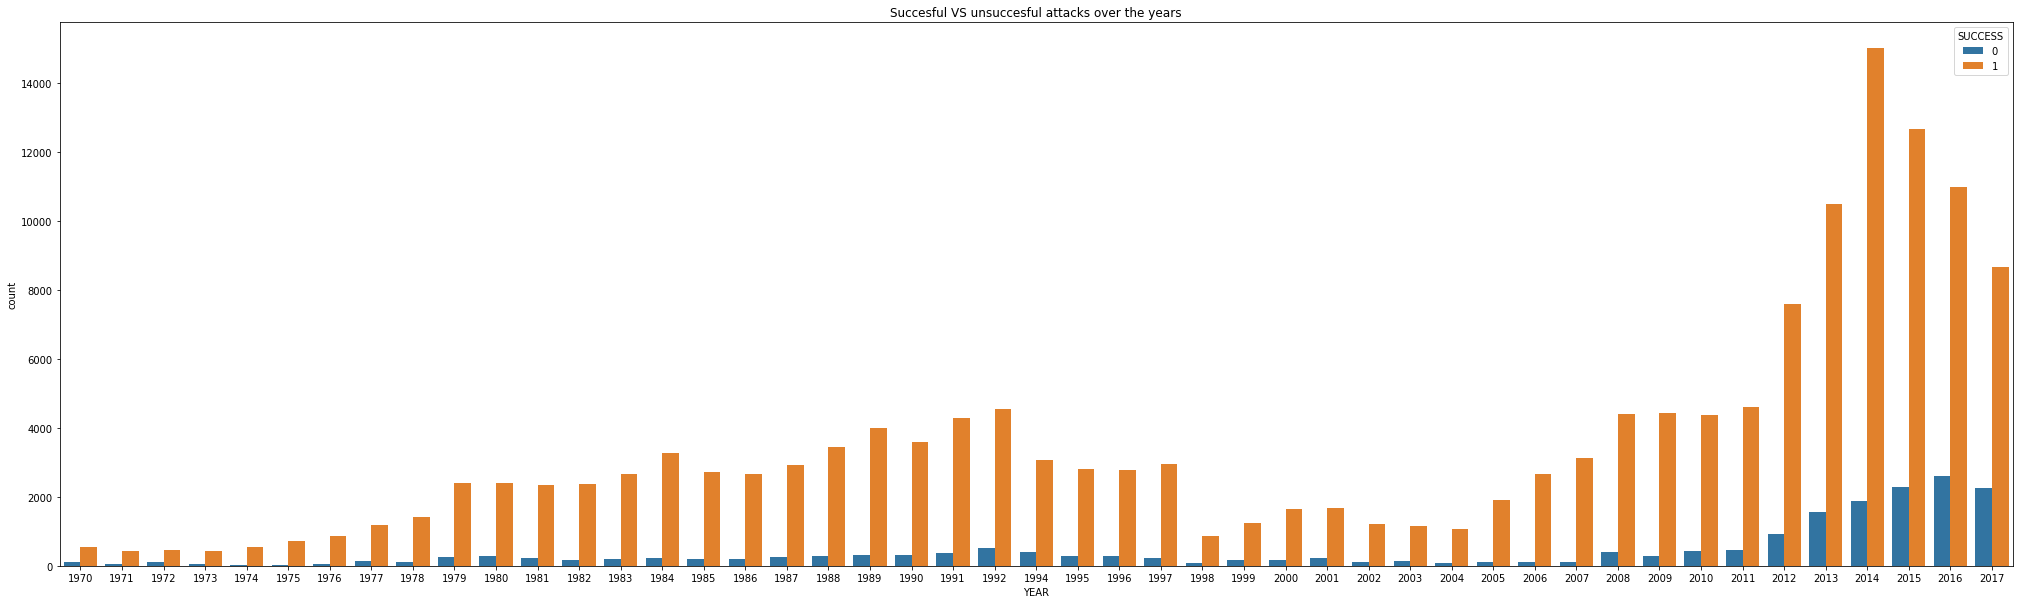

In [ ]:
#Visualisation of number of attacks per year country wise
total_attacks=px.choropleth( global_terrorismdata.groupby(['YEAR','COUNTRY'])['eventid'].count().reset_index(),locations='COUNTRY',locationmode='country names',color='eventid', hover_name='COUNTRY',
                            title='NUMBER OF ATTACKS PER YEAR(1970-2017)',
                            color_continuous_scale = px.colors.sequential.OrRd,
                            animation_frame='YEAR',labels={'eventid':'NO. OF ATTACKS'})
total_attacks.show()
#Visualisation of total number of casualities country wise
total_casuality=px.choropleth( global_terrorismdata.groupby('COUNTRY')['CASUALITY'].sum().reset_index(),locations='COUNTRY',locationmode='country names',color='CASUALITY',
                            hover_name='COUNTRY',
                            title='TOTAL NUMBER OF CASUALITIES(1970-2017)',
                            color_continuous_scale = px.colors.sequential.OrRd,
                            labels={'CASUALITY':'NO. OF CASUALITIES'})
total_casuality.show()        
#Count plot on Succesful VS unsuccesful attacks over the years
plt.rcParams['figure.figsize']=[35,10]
sns.countplot(x='YEAR',hue='SUCCESS',data=global_terrorismdata)
plt.title('Succesful VS unsuccesful attacks over the years')
plt.show()
#Line plot on region wise number of attacks and
Region_wise=px.line(data_frame=pd.merge(global_terrorismdata.groupby('REGION')['CASUALITY'].sum().reset_index(), global_terrorismdata.groupby('REGION')['No.of attacks'].count().reset_index(), how='inner').sort_values('No.of attacks',ascending=False)
                    ,y=['No.of attacks','CASUALITY'],x='REGION',title='REGION WISE NUNMBER OF ATTACKS AND CASUALITIES')
Region_wise.show()
#Treemap visualisation affected countries in terms of number of attack
treemap_country_wise=px.treemap(data_frame=global_terrorismdata,
                     values='No.of attacks',
                     path=['COUNTRY','STATE'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on country and state in terms of number of attacks',)
treemap_country_wise.show()

In [ ]:
#Dataframe of top 2 regions affected by terrorism which in a way constituted 50% of total events
country_wise_attacks=global_terrorismdata.groupby('REGION')['No.of attacks'].count().sort_values(ascending=False).reset_index()
country_wise_attacks['percentage']=country_wise_attacks['No.of attacks']*100/181691
tot_row_re = pd.DataFrame(country_wise_attacks.head(2).sum()).T
tot_row_re['REGION'] = 'TOTAL'
print('Dataframe of top 2 regions affected by terrorism which in a way constituted 50% of total events')
display(pd.concat([country_wise_attacks.head(2), tot_row_re]))
#Dataframe of top 8 countries affected by terrorism which in a way constituted 50% of total events
country_wise_attacks=global_terrorismdata.groupby('COUNTRY')['No.of attacks'].count().sort_values(ascending=False).reset_index()
country_wise_attacks['percentage']=country_wise_attacks['No.of attacks']*100/181691
country_wise_attacks.head(8)
tot_row = pd.DataFrame(country_wise_attacks.head(8).sum()).T
tot_row['COUNTRY'] = 'TOTAL'
print('Dataframe of top 8 countries affected by terrorism which in a way constituted 50% of total events')
pd.concat([country_wise_attacks.head(8), tot_row])

Dataframe of top 2 regions affected by terrorism which in a way constituted 50% of total events


REGION No.of attacks percentage
0  Middle East & North Africa         50474  27.780132
1                  South Asia         44974  24.753015
0                       TOTAL         95448  52.533147

Dataframe of top 8 countries affected by terrorism which in a way constituted 50% of total events


COUNTRY No.of attacks percentage
0         Iraq         24636  13.559285
1     Pakistan         14368   7.907932
2  Afghanistan         12731   7.006951
3        India         11960   6.582605
4     Colombia          8306   4.571498
5  Philippines          6908    3.80206
6         Peru          6096   3.355147
7  El Salvador          5320   2.928048
0        TOTAL         90325  49.713525

# ***2.1 Analysis based on Inclusion Criteria (crit1, crit2, crit3)***

  These variables record which of the inclusion criteria (in addition to the necessary criteria) are met. This allows users to filter out those incidents whose inclusion was based on a criterion which they believe does not constitute terrorism proper. Note that for each of the criteria variables a case is coded as “1” if source information indicates that the criterion is met and “0” if source information indicates that the criterion is not met or that there is no indication that it is met.

***Criterion 1: POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL (CRIT1)***

The violent act must be aimed at attaining a political, economic, religious, or social goal.
This criterion is not satisfied in those cases where the perpetrator(s) acted out of a pure
profit motive or from an idiosyncratic personal motive unconnected with broader
societal change.

1 = "Yes" The incident meets Criterion 1.

0 = "No" The incident does not meet Criterion 1 or there is no indication that the
incident meets Criterion 1.

***Criterion 2: INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE(S)
(CRIT2)***

To satisfy this criterion there must be evidence of an intention to coerce, intimidate, or
convey some other message to a larger audience (or audiences) than the immediate
victims. Such evidence can include (but is not limited to) the following: pre- or postattack statements by the perpetrator(s), past behavior by the perpetrators, or the
particular nature of the target/victim, weapon, or attack type.

1 = "Yes" The incident meets Criterion 2.

0 = "No" The incident does not meet Criterion 2 or no indication.

***Criterion 3: OUTSIDE INTERNATIONAL HUMANITARIAN LAW (CRIT3)***

The action is outside the context of legitimate warfare activities, insofar as it targets
non-combatants (i.e. the act must be outside the parameters permitted by international
humanitarian law as reflected in the Additional Protocol to the Geneva Conventions of
12 August 1949 and elsewhere).

1 = "Yes" The incident meets Criterion 3.

0 = "No" The incident does not meet Criterion 3.


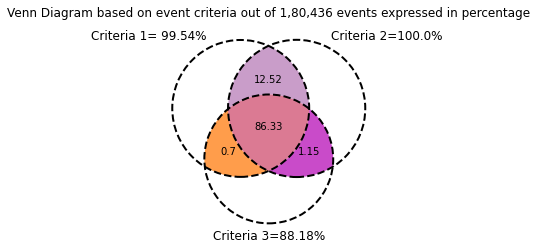

In [14]:
crit1=round(global_terrorismdata[(global_terrorismdata.crit1==1)]['eventid'].count()*100/180436,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit2=round(global_terrorismdata[(global_terrorismdata.crit2==1)]['eventid'].count()*100/180436,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit3=round(global_terrorismdata[(global_terrorismdata.crit3==1)]['eventid'].count()*100/180436,2)#COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_1_2_3=round(global_terrorismdata[(global_terrorismdata.crit1==1) & (global_terrorismdata.crit2==1) & (global_terrorismdata.crit3==1)]['eventid'].count()*100/180436,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_1_2=round(global_terrorismdata[(global_terrorismdata.crit1==1) & (global_terrorismdata.crit2==1) & (global_terrorismdata.crit3==0)]['eventid'].count()*100/180436,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_1_3=round(global_terrorismdata[(global_terrorismdata.crit1==1) & (global_terrorismdata.crit3==1) & (global_terrorismdata.crit2==0)]['eventid'].count()*100/180436,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1
crit_2_3=round(global_terrorismdata[(global_terrorismdata.crit2==1) & (global_terrorismdata.crit3==1) & (global_terrorismdata.crit1==0)]['eventid'].count()*100/180436,2)
           #COUNT OF TOTAL EVENTS IN TERMS OF PERCENTAGE WHICH FALLS UNDER CRITERIA 1

v=venn3(subsets=(crit1, crit2, crit_1_2, crit3,crit_1_3, crit_2_3,crit_1_2_3), 
      set_labels=('Criteria 1= 99.54%', 'Criteria 2=100.0%', 'Criteria 3=88.18%'), 
      set_colors=("orange", "blue", "red"), alpha=0.7)
v.get_patch_by_id('100').set_color("white")
v.get_label_by_id("100").set_text("")
v.get_patch_by_id('001').set_color("white")
v.get_label_by_id("001").set_text("")
v.get_patch_by_id('010').set_color("white")
v.get_label_by_id("010").set_text("")
venn3_circles(subsets=(crit1, crit2, crit_1_2, crit3,crit_1_3, crit_2_3,crit_1_2_3), 
              linestyle="dashed", linewidth=2)
plt.title("Venn Diagram based on event criteria out of 1,80,436 events expressed in percentage")
plt.show()

In [ ]:

treemap_target_wise=px.treemap(data_frame=global_terrorismdata[(global_terrorismdata.crit1==0) & (global_terrorismdata.crit2==1) & (global_terrorismdata.crit3==1)],
                     values='No.of attacks',
                     path=['COUNTRY'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on target type and organisation in terms of number of attacks',)
treemap_target_wise.show()

In [ ]:
global_terrorismdata[(global_terrorismdata.crit1==0) & (global_terrorismdata.crit2==1) & (global_terrorismdata.crit3==1)].

# **2.3 Analysis based on target types**

In [15]:
#pie chart on target type
target_type_piechart=px.pie(global_terrorismdata.groupby('TARGET TYPE')['No.of attacks'].count().reset_index(), 
          values='No.of attacks',
          names='TARGET TYPE',
          title='Total number of attacks interms of target type')
target_type_piechart.show()

In [ ]:
#Treemap visualisation of target types and country with respect to number of attacks
treemap_target_type=px.treemap(data_frame=global_terrorismdata,
                     values='No.of attacks',
                     path=['TARGET TYPE','COUNTRY'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on target types and country in terms of number of attacks',)
treemap_target_type.show()
#Treemap visualisation of organisation interms of target types with respect to number of attacks
treemap_target_wise=px.treemap(data_frame=global_terrorismdata,
                     values='No.of attacks',
                     path=['TARGET TYPE','ORGANISATION'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on target type and organisation in terms of number of attacks',)
treemap_target_wise.show()

In [ ]:
treemap=px.treemap(data_frame=global_terrorismdata,
           values='No.of attacks',
           path=['ORGANISATION','COUNTRY','STATE'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation, country and state in terms of number of attacks',)
treemap.show()

In [ ]:
treemap=px.treemap(data_frame=global_terrorismdata,
           values='No.of attacks',
           path=['COUNTRY','ORGANISATION'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation, country and state in terms of number of attacks',)
treemap.show()

In [ ]:
treemap=px.treemap(data_frame=global_terrorismdata,
           values='No.of attacks',
           path=['ORGANISATION','ATTACK TYPE'],
           color_discrete_sequence=px.colors.sequential.Redor_r,
           title='Treemap based on organisation, country and state in terms of number of attacks',)
treemap.show()

#Analysising most affected regions i.e, Middle East & North Africa and south Asia

In [ ]:
#Pie diagram on number of attacks in top affected regions
Me=pd.DataFrame(global_terrorismdata[global_terrorismdata.REGION=='Middle East & North Africa'].groupby('COUNTRY')['No.of attacks'].count().reset_index())#For Middle East & North Africa
MeNa=px.pie(fg, values='No.of attacks',names='COUNTRY',title='TOTAL NUMBER OF ATTACKS IN THE MIDDLE EAST & NORTH AFRICA REGION COUNTRY WISE')
MeNa.show()
Sa=pd.DataFrame(global_terrorismdata[global_terrorismdata.REGION=='South Asia'].groupby('COUNTRY')['No.of attacks'].count().reset_index())#For South asia
Sar=px.pie(Sa, values='No.of attacks',names='COUNTRY',title='TOTAL NUMBER OF ATTACKS IN THE SOUTH ASIAN REGION COUNTRY WISE')
Sar.show()

In [ ]:
global_terrorismdata.groupby(['YEAR'])['eventid'].count().sort_values(ascending=False)

In [ ]:
global_terrorismdata.groupby('YEAR')['CASUALITY'].sum()

In [ ]:
plt.rcParams['figure.figsize']=[25,10]

In [ ]:
jk=global_terrorismdata.

In [ ]:
print(crit1,crit2,crit3)

99.54 100.0 88.18


In [16]:
crit2_3_top4=global_terrorismdata[(global_terrorismdata.crit1==0) & (global_terrorismdata.crit2==1) & (global_terrorismdata.crit3==1)].groupby('COUNTRY')['No.of attacks'].count().sort_values(ascending=False).reset_index().head(4)
crit1_3_top4=global_terrorismdata[(global_terrorismdata.crit1==1) & (global_terrorismdata.crit2==0) & (global_terrorismdata.crit3==1)].groupby('COUNTRY')['No.of attacks'].count().sort_values(ascending=False).reset_index().head(4)
crit1_2_top4=global_terrorismdata[(global_terrorismdata.crit1==1) & (global_terrorismdata.crit2==1) & (global_terrorismdata.crit3==0)].groupby('COUNTRY')['No.of attacks'].count().sort_values(ascending=False).reset_index().head(4)
crit1_2_3_top4=global_terrorismdata[(global_terrorismdata.crit1==1) & (global_terrorismdata.crit2==1) & (global_terrorismdata.crit3==1)].groupby('COUNTRY')['No.of attacks'].count().sort_values(ascending=False).reset_index().head(4)

In [17]:
crit2_3_top4['Criteria']=0
crit1_3_top4['Criteria']=1
crit1_2_top4['Criteria']=2
crit1_2_3_top4['Criteria']=3
ty=pd.concat([crit2_3_top4, crit1_3_top4, crit1_2_top4])
ty.reset_index()


index         COUNTRY  No.of attacks  Criteria
0       0        Pakistan            314         0
1       1           India            174         0
2       2     Philippines            173         0
3       3    South Africa            108         0
4       0  United Kingdom            125         1
5       1         Lebanon            117         1
6       2        Pakistan            113         1
7       3           India             98         1
8       0            Iraq           2516         2
9       1     Afghanistan           1718         2
10      2     El Salvador           1549         2
11      3         Somalia           1336         2

In [18]:

ty=ty.pivot_table(index='Criteria',columns='COUNTRY')

In [19]:
ty.columns = ty.columns.droplevel()


In [20]:
ty=ty.reset_index()

COUNTRY   Afghanistan  El Salvador    India     Iraq  Lebanon  Pakistan  \
Criteria                                                                  
0                 NaN          NaN    174.0      NaN      NaN     314.0   
1                 NaN          NaN     98.0      NaN    117.0     113.0   
2              1718.0       1549.0      NaN   2516.0      NaN       NaN   
3             10958.0          NaN  11135.0  22044.0      NaN   12667.0   

COUNTRY   Philippines  Somalia  South Africa  United Kingdom  index  
Criteria                                                             
0               173.0      NaN         108.0             NaN      0  
1                 NaN      NaN           NaN           125.0      1  
2                 NaN   1336.0           NaN             NaN      2  
3                 NaN      NaN           NaN             NaN      3

0
1
2


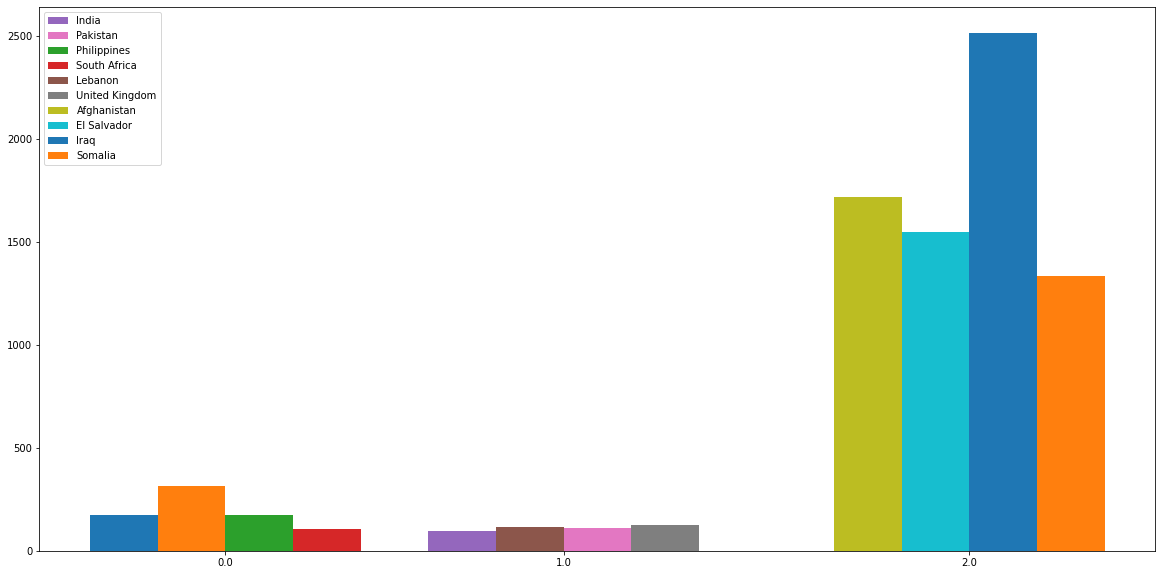

In [23]:


fig = plt.figure(figsize=(20, 10))


# width of bars
width = 1

# create emptly lists for x tick positions and names
x_ticks, x_ticks_pos = [], []

# counter for helping with x tick positions
count = 0

# reset the index
# so that we can iterate through the numbers.
# this will help us to get the x tick positions

# go through each row of the dataframe
for idx, row in ty.iterrows():
    print(idx)
    # this will be the first bar position for this row
    count += idx

    # this will be the start of the first bar for this row
    start_idx = count - width / 2
    # this will be the end of the last bar for this row
    end_idx = start_idx
    # for each column in the wanted columns,
    # if the row is not null,
    # add the bar to the plot
    # also update the end position of the bars for this row
    for column in ty.drop(["Criteria"], axis=1).columns:
        if row[column] == row[column]:
            plt.bar(count, row[column], width=width, label=column)
            count += 1
            end_idx += width
    # this checks if the row had any not NULL value in the desired columns
    # in other words, it checks if there was any bar for this row
    # if yes, add the center of all the row's bars and the row's name (A,B,C) to the respective lists
    if end_idx != start_idx:
        x_ticks_pos.append((end_idx + start_idx) / 2)
        x_ticks.append(row["Criteria"])

# now set the x_ticks
plt.xticks(x_ticks_pos, x_ticks)

# also plot the legends
# and make sure to not display duplicate labels
# the below code is taken from:
# https://stackoverflow.com/questions/13588920/stop-matplotlib-repeating-labels-in-legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

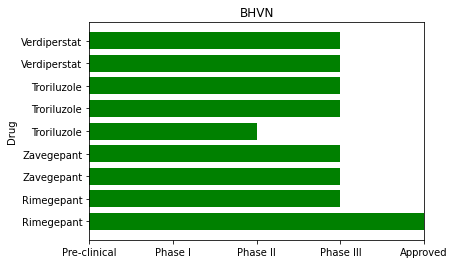

In [2]:
x = [u'Rimegepant',u'Rimegepant',u'Zavegepant',u'Zavegepant',u'Troriluzole',u'Troriluzole',u'Troriluzole',u'Verdiperstat',u'Verdiperstat']

y = [4,3,3,3,2,3,3,3,3]

Disease = ['Acute Treatment of Migraine','Preventive Treatment of Migraine','Acute and Preventive Migraine','Lung Inflammation COVID-19',"Alzheimer's Disease", "OCD", "Spinocerebellar Ataxia", "Multiple System Atrophy", "Amyotrophic Lateral Sclerosis"]

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="green", align='edge')
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.xticks(np.arange(5),('Pre-clinical','Phase I','Phase II','Phase III', 'Approved'))
plt.margins(0,0.05)
plt.title('BHVN')
plt.ylabel('Drug')

plt.show()